In [ ]:
import io
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd
''' Fontes utilizadas:
1) Aprenda Python 3 do jeito certo - Shaw, Zed A. Aprenda Python 3 Do Jeito Certo: Uma Introdução Muito Simples Ao IncríVel Mundo Dos Computadores e Da Codificação. Rio de Janeiro: Alta Books, 2019. Print.
2) Python para Análise de Dados - PYTHON para Análise de Dados - 3ª edição: Tratamento de Dados com pandas, NumPy & Jupyter. 3ª. ed. [S. l.: s. n.], 2023. v. 784.
3) Documentação do Pandas: https://pandas.pydata.org/docs/
4) Documentação da Biblioteca matplotlib: https://matplotlib.org/stable/users/explain/quick_start.html

'''
# Trazendo o CSV ao Colab
uploaded = files.upload()

# Obter o nome do arquivo carregado
arquivo = list(uploaded.keys())[0]

# Utilizar a sintaxe with open para ler o arquivo e transformar em DataFrame para utilizar o pandas
dados = []
with open(arquivo, 'r') as file:
    for linha in file:
        dados.append(linha.strip().split(','))

# Transformando 'dados' em um DataFrame com Pandas
dados = pd.DataFrame(dados)

# Ajustar as colunas do DataFrame
colunas = ['data', 'precip', 'maxima', 'minima', 'horas_insol', 'temp_media', 'um_relativa', 'vel_vento']
dados.columns = colunas

# Exibir as primeiras linhas do DataFrame
print("Primeiras linhas do DataFrame:")
print(dados.head())


Saving Anexo_Arquivo_Dados_Projeto_Logica_e_programacao_de_computadores.csv to Anexo_Arquivo_Dados_Projeto_Logica_e_programacao_de_computadores.csv
Primeiras linhas do DataFrame:
         data  precip  maxima  minima  horas_insol  temp_media  um_relativa  \
0        data  precip  maxima  minima  horas_insol  temp_media  um_relativa   
1  01/01/1961       0    33.8    22.2         11.7       27.08           67   
2  02/01/1961       0    34.7    22.5          9.5       28.06         62.5   
3  03/01/1961     0.2    27.7    23.1          2.3       24.32        74.25   
4  04/01/1961     2.4    29.4    20.6          8.7       23.56         57.5   

   vel_vento  
0  vel_vento  
1   2.333333  
2   1.333333  
3          2  
4   2.333333  


In [ ]:
#a) Visualização de intervalo de dados em modo texto:
def visualizar_dados(dados):
    # Remover a primeira linha já que o pandas duplicou no dataframe
    dados = dados.drop(0)

    # Converter a coluna 'data' em datetime
    dados['data'] = pd.to_datetime(dados['data'], format='%d/%m/%Y')

    # Solicitar entradas do usuário para o mês inicial e validar o valor
    while True:
        mes_inicial = int(input("Informe o mês inicial (1-12): "))
        if 1 <= mes_inicial <= 12:
            break
        else:
            print("Mês inválido. Por favor, utilize o intervalo de 1 a 12.")

    # Solicitar entradas do usuário para o mês final e validar o valor
    while True: #inicio do loop e evitando que o usuario digite um valor fora do intervalo válido.
        mes_final = int(input("Informe o mês final (1-12): "))
        if 1 <= mes_final <= 12:
            break
        else:
            print("Mês inválido. Por favor, utilize o intervalo de 1 a 12.") #permitindo que o usuário insira o mês novamente

    # Verificar se os anos estão dentro do intervalo dos dados disponíveis
    anos_disponiveis = dados['data'].dt.year.unique()

    while True:
        ano_inicial = int(input("Informe o ano inicial: "))
        if ano_inicial in anos_disponiveis:
            break
        else:
            print("Ano não encontrado. Tente novamente.")

    while True:
        ano_final = int(input("Informe o ano final: "))
        if ano_final in anos_disponiveis:
            break
        else:
            print("Ano não encontrado. Tente novamente.")

    # Solicitar o tipo de dados desejado
    print("\nEscolha o tipo de dados:")
    print("1 - Todos os dados")
    print("2 - Apenas precipitação")
    print("3 - Apenas temperatura")
    print("4 - Apenas umidade e vento")

    escolha_tipo_dados = int(input("Digite o número correspondente: "))

    # Filtrar os dados conforme as preferências do usuário
    dados_filtrados = dados[(dados['data'].dt.month >= mes_inicial) &
                            (dados['data'].dt.month <= mes_final) &
                            (dados['data'].dt.year >= ano_inicial) &
                            (dados['data'].dt.year <= ano_final)]

    if escolha_tipo_dados == 2:
        dados_filtrados = dados_filtrados[dados_filtrados['precip'] != '0']
    elif escolha_tipo_dados == 3:
        dados_filtrados = dados_filtrados[(dados_filtrados['maxima'] != '0') &
                                           (dados_filtrados['minima'] != '0')]
    elif escolha_tipo_dados == 4:
        dados_filtrados = dados_filtrados[(dados_filtrados['um_relativa'] != '0') &
                                           (dados_filtrados['vel_vento'] != '0')]

    # Exibir os dados filtrados
    print("\nDados no período selecionado:")
    print(dados_filtrados)

# Chamar a função com os dados carregados
visualizar_dados(dados)

''' Com o código estruturado foi possível e incluir validações para garantir que as entradas do usuário estejam dentro dos limites esperados e que os anos fornecidos estejam presentes nos dados. Isso ajuda a garantir que a análise seja feita apenas com dados válidos e relevantes para o período especificado pelo usuário. '''

Informe o mês inicial (1-12): 13
Mês inválido. Por favor, utilize o intervalo de 1 a 12.
Informe o mês inicial (1-12): 1
Informe o mês final (1-12): 3
Informe o ano inicial: 2006
Informe o ano final: 2007

Escolha o tipo de dados:
1 - Todos os dados
2 - Apenas precipitação
3 - Apenas temperatura
4 - Apenas umidade e vento
Digite o número correspondente: 1

Dados no período selecionado:
            data precip maxima minima horas_insol temp_media um_relativa  \
14720 2006-01-01   11.6   29.7   20.4         9.4       24.9       75.25   
14721 2006-01-02    9.3   28.4   22.2         4.7       24.3        81.5   
14722 2006-01-03   38.3   27.8   20.2         4.7       23.7       72.75   
14723 2006-01-04      0   30.3   18.6        11.1      23.54        71.5   
14724 2006-01-05      0   28.6   18.4         9.8      22.72       65.25   
...          ...    ...    ...    ...         ...        ...         ...   
15170 2007-03-27    6.8   34.8   20.4         8.8      27.48        77.5   
151

In [64]:
#b) Mes mais chuvoso
import pandas as pd

# Função para encontrar o mês mais chuvoso para um ano específico
def mes_mais_chuvoso(dados, ano_consultado):
    precip_mes_ano = {}  # Dicionário para armazenar a precipitação por mês/ano

    # Filtrar os dados para o ano consultado
    dados_ano = dados[dados['data'].str.contains(str(ano_consultado))]  # Filtrar por ano específico

    for indice, linha in dados_ano.iterrows():
        # Extrair o mês e precipitação de cada linha
        mes = linha['data'].split('/')[1]  # Extrair o mês da data
        precipitacao = float(linha['precip'])

        # Atualizar o total de precipitação para o mês/ano atual
        chave = (mes, ano_consultado)
        if chave not in precip_mes_ano:
            precip_mes_ano[chave] = 0
        precip_mes_ano[chave] += precipitacao

    # Encontrar o mês mais chuvoso do ano consultado
    if precip_mes_ano:
        mes_mais_chuvoso = max(precip_mes_ano, key=precip_mes_ano.get)
        maior_precipitacao = precip_mes_ano[mes_mais_chuvoso]
        return mes_mais_chuvoso, maior_precipitacao
    else:
        return None, None

# Solicitando o ano que o usuário quer consultar
while True:
    try:
        ano_consultado = int(input("Informe o ano que deseja consultar o mês mais chuvoso: "))
        if ano_consultado not in dados['data'].str.split('/').str[-1].astype(int).unique():
            raise ValueError("Ano inválido. Tente novamente.")
        break
    except ValueError as e:
        print(e)

# Chamar a função e armazenar o resultado
mes_ano_mais_chuvoso, maior_precipitacao = mes_mais_chuvoso(dados, ano_consultado)

# Verificar se o resultado foi encontrado e imprimir
if mes_ano_mais_chuvoso is not None:
    mes, ano = mes_ano_mais_chuvoso
    print(f"O mês mais chuvoso em {ano_consultado} foi o mês {mes} com uma precipitação de {maior_precipitacao:.2f}.")
else:
    print(f"Nenhuma informação para o ano {ano_consultado}.")


Informe o ano que deseja consultar o mês mais chuvoso: 1
Ano inválido. Tente novamente.
Informe o ano que deseja consultar o mês mais chuvoso: 2006
O mês mais chuvoso em 2006 foi o mês 01 com uma precipitação de 174.20.


In [67]:
#c) Média da temperatura mínima de um determinado mês (auge do inverno) nos últimos 11 anos (2006 a 2016):

# Função para encontrar o mês mais chuvoso e a maior precipitação nesse mês entre 2006 - 2016

''' O objetivo da estruturação foi facilitar a compreensão das operações realizadas e a interação com o usuário para obter informações específicas sobre os dados meteorológicos de uma só vez.'''

def mes_mais_chuvoso(dados):
    precipitacao_por_mes_ano = {} #Dicionário para armazenar as precipitações

    # Ignorar a primeira linha (cabeçalho)
    dados = dados.iloc[1:]

    # Iterar sobre os dados para calcular a precipitação por mês e ano
    for indice, linha in dados.iterrows():
        # Extrair o mês, ano e precipitação de cada linha
        data = pd.to_datetime(linha['data'], format='%d/%m/%Y')
        mes = data.month
        ano = data.year
        precipitacao = float(linha['precip'])

        chave = (mes, ano)

        # Atualizar o total de precipitação para o mês/ano atual
        if chave not in precipitacao_por_mes_ano:
            precipitacao_por_mes_ano[chave] = 0  #Inicializa o total de precipitação para o mês/ano atual
        precipitacao_por_mes_ano[chave] += precipitacao ## Atualiza o total de precipitação com o valor atual

    # Encontrar o mês mais chuvoso do período analisado
    mes_ano_mais_chuvoso = max(precipitacao_por_mes_ano, key=precipitacao_por_mes_ano.get)

    # Encontrar a maior precipitação no mês mais chuvoso
    maior_precipitacao_mes_chuvoso = dados.loc[(pd.to_datetime(dados['data'], format='%d/%m/%Y').dt.month == mes_ano_mais_chuvoso[0]) &
                                               (pd.to_datetime(dados['data'], format='%d/%m/%Y').dt.year == mes_ano_mais_chuvoso[1]) &
                                               (dados['precip'] == dados['precip'].max())]

    # Verificar se há resultados antes de acessar o primeiro elemento utilizando LEN
    if len(maior_precipitacao_mes_chuvoso) > 0:
        maior_precipitacao_mes_chuvoso_dict = maior_precipitacao_mes_chuvoso.to_dict('records')[0]
    else:
        maior_precipitacao_mes_chuvoso_dict = None

    # Utilizando o Dicionário criado para armazenar os resultados
    resultado = {
        'mes_mais_chuvoso': mes_ano_mais_chuvoso[0],
        'ano_mais_chuvoso': mes_ano_mais_chuvoso[1],
        'maior_precipitacao_mes_chuvoso': maior_precipitacao_mes_chuvoso_dict
    }

    return resultado
#-------------------------------------------------------------------------------------
# Função para calcular a média da temperatura mínima de um determinado mês e ano
def calcular_media_temperatura_minima(dados, mes, ano):
    # Filtrar os dados para o mês e ano especificados
    dados_filtrados = dados[(pd.to_datetime(dados['data'], format='%d/%m/%Y').dt.month == mes) &
                            (pd.to_datetime(dados['data'], format='%d/%m/%Y').dt.year == ano)]

    # Calcular a média da temperatura mínima
    media_temperatura_minima = dados_filtrados['minima'].mean()

    return media_temperatura_minima

# Validar entrada do usuário para o mês
while True:
    mes = input("Informe o mês desejado (1-12): ")
    if mes.isdigit():
        mes = int(mes) #permitindo a entrada somente de numeros inteiros. Aqui quero evitar que o usuário filtre "3,5" por exemplo.
        if 1 <= mes <= 12:
            break
    print("Mês inválido. Por favor, insira um mês válido.")

# Chamar a função mes_mais_chuvoso para obter o ano mais chuvoso
resultado_mes_chuvoso = mes_mais_chuvoso(dados)

# Iterar de 2006 a 2016
for ano in range(2006, 2017):
    # Calcular a média da temperatura mínima para o mês informado e o ano atual
    media_temp_minima = calcular_media_temperatura_minima(dados, mes, ano)

    # Exibir a média da temperatura mínima para o ano atual
    print(f"Média da temperatura mínima para o mês {mes} do ano {ano}: {media_temp_minima:.2f}°C")



Informe o mês desejado (1-12): 2
Média da temperatura mínima para o mês 2 do ano 2006: 20.76°C
Média da temperatura mínima para o mês 2 do ano 2007: 20.50°C
Média da temperatura mínima para o mês 2 do ano 2008: 20.02°C
Média da temperatura mínima para o mês 2 do ano 2009: 20.69°C
Média da temperatura mínima para o mês 2 do ano 2010: 22.22°C
Média da temperatura mínima para o mês 2 do ano 2011: 21.73°C
Média da temperatura mínima para o mês 2 do ano 2012: 22.30°C
Média da temperatura mínima para o mês 2 do ano 2013: 20.81°C
Média da temperatura mínima para o mês 2 do ano 2014: 21.85°C
Média da temperatura mínima para o mês 2 do ano 2015: 21.17°C
Média da temperatura mínima para o mês 2 do ano 2016: 21.81°C


Informe o mês desejado (1-12): 1


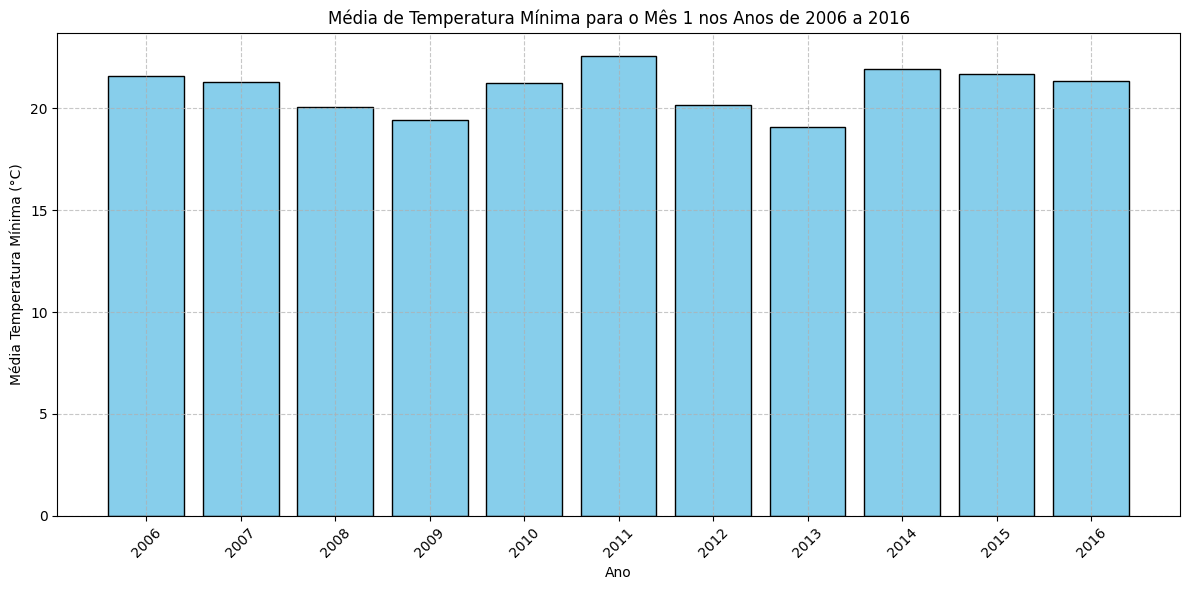

In [ ]:
#d) Gráfico de barras (vertical ou horizontal) com as médias de temperatura mínima de um determinado mês nos últimos 11 anos. (2006 a 2016).


def plotar_grafico_media_temperatura_minima(dados):
    # Converter a coluna 'data' para o tipo datetime
    dados['data'] = pd.to_datetime(dados['data'], format='%d/%m/%Y')

    # Definir os anos inicial e final
    ano_inicial = 2006
    ano_final = 2016

    # Solicitar o mês desejado
    while True:
        mes_escolhido = input("Informe o mês desejado (1-12): ")
        if mes_escolhido.isdigit():
            mes_escolhido = int(mes_escolhido)
            if 1 <= mes_escolhido <= 12:
                break
        print("Mês inválido. Por favor, insira um mês válido.")

    # Criar dicionário para armazenar a média da temperatura mínima por ano e mês
    media_temperatura_minima = {}

    # Iterar sobre os anos
    for ano in range(ano_inicial, ano_final + 1):
        # Filtrar os dados para o ano atual
        dados_ano_atual = dados[dados['data'].dt.year == ano]

        # Filtrar os dados para o mês escolhido
        dados_mes_atual = dados_ano_atual[dados_ano_atual['data'].dt.month == mes_escolhido]

        # Calcular a média da temperatura mínima para o mês e ano atual
        media_minima_mes_ano = dados_mes_atual['minima'].mean()

        # Armazenar a média no dicionário
        chave = f"{ano}"
        media_temperatura_minima[chave] = media_minima_mes_ano

    # Criar um DataFrame a partir do dicionário
    df = pd.DataFrame(list(media_temperatura_minima.items()), columns=['Ano', 'Média Temperatura Mínima'])

    # Plotar o gráfico de barras
    plt.figure(figsize=(12, 6))
    plt.bar(df['Ano'], df['Média Temperatura Mínima'], color='skyblue', edgecolor='black')

    # Adicionar rótulos e legendas
    plt.xlabel('Ano')
    plt.ylabel('Média Temperatura Mínima (°C)')
    plt.title(f'Média de Temperatura Mínima para o Mês {mes_escolhido} nos Anos de {ano_inicial} a {ano_final}')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Exibir o gráfico
    plt.show()

# Utilizando os dados
dados = pd.read_csv('Anexo_Arquivo_Dados_Projeto_Logica_e_programacao_de_computadores.csv')
plotar_grafico_media_temperatura_minima(dados)



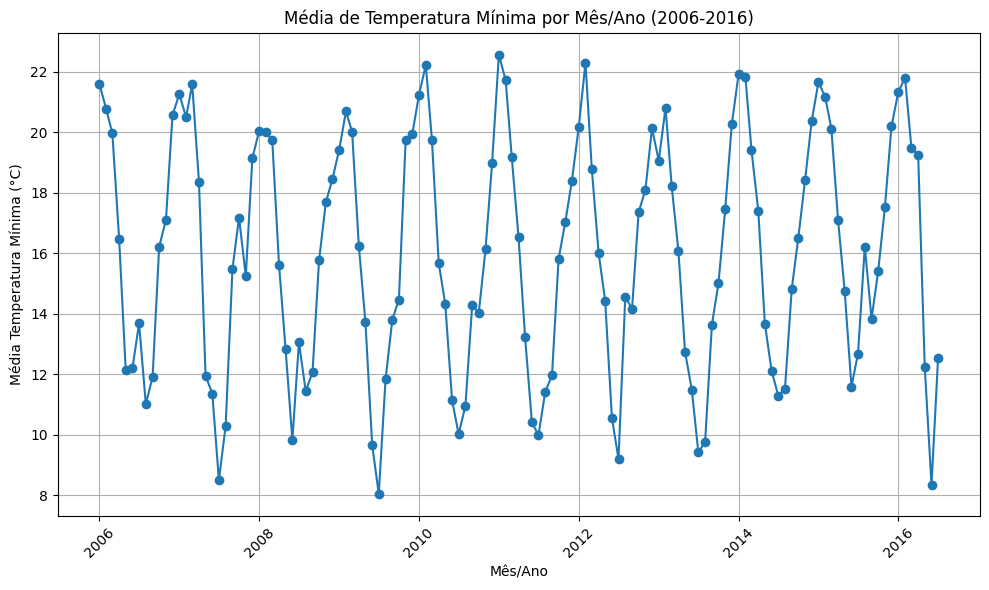

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plotar_grafico_media_temperatura_minima():
    # Convertendo a coluna 'data' para datetime
    dados['data'] = pd.to_datetime(dados['data'], format='%d/%m/%Y')

    # Criar dicionário para armazenar a média da temperatura mínima por ano e mês
    media_temperatura_minima = {}

    # Iterar sobre os anos
    for ano in range(2006, 2017):
        # Filtrar os dados para o ano atual
        dados_ano_atual = dados[dados['data'].dt.year == ano]

        # Iterar sobre os meses
        for mes in range(1, 13):
            # Filtrar os dados para o mês e ano atual
            dados_mes_atual = dados_ano_atual[dados_ano_atual['data'].dt.month == mes]

            # Calcular a média da temperatura mínima para o mês e ano atual
            media_minima_mes_ano = dados_mes_atual['minima'].mean()

            # Armazenar a média no dicionário
            chave = f"{mes}/{ano}"
            media_temperatura_minima[chave] = media_minima_mes_ano

    # Criar um DataFrame a partir do dicionário
    df = pd.DataFrame(list(media_temperatura_minima.items()), columns=['Mês/Ano', 'Média Temperatura Mínima'])

    # Ordenar o DataFrame pela coluna 'Mês/Ano'
    df['Mês/Ano'] = pd.to_datetime(df['Mês/Ano'], format='%m/%Y')
    df = df.sort_values(by='Mês/Ano')

    # Plotar o gráfico de linhas
    plt.figure(figsize=(10, 6))
    plt.plot(df['Mês/Ano'], df['Média Temperatura Mínima'], marker='o', linestyle='-')

    # Adicionar rótulos e legendas
    plt.xlabel('Mês/Ano')
    plt.ylabel('Média Temperatura Mínima (°C)')
    plt.title('Média de Temperatura Mínima por Mês/Ano (2006-2016)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()

    # Exibir o gráfico
    plt.show()

#Utilizando gráficos de linhas para demonstrar a média minima por mês/ano
plotar_grafico_media_temperatura_minima()


In [71]:
#e) Média geral da temperatura mínima de um determinado mês nos últimos 11 anos (2006 a 2016) utilizando o dict do item (c):
'''O que compreendi com o exercicio foi: Ao executar o gráfico, o usuário obteria um resultado
geral da base de dados com: a) mes mais chuvoso; b) ano mais chuvoso c) média geral para o messe mês
mais chuvoso. Sem precisar inserir dados'''

# Definir a função para encontrar o mês mais chuvoso e a média geral da temperatura para esse mês
def mes_mais_chuvoso(dados):
    precipitacao_por_mes_ano = {}  # Dicionário criado no item C para armazenar os dados de precipitação e temperatura por mês e ano

    # Ignorar a primeira linha (cabeçalho)
    dados = dados.iloc[1:]

    # Iterar sobre os dados para calcular a precipitação e temperatura por mês e ano
    #Utilizando o mesmo critério das outras sintaxes
    for indice, linha in dados.iterrows():
        # Extrair o mês, ano, precipitação e temperatura média de cada linha
        data = pd.to_datetime(linha['data'], format='%d/%m/%Y')
        mes = data.month
        ano = data.year
        precipitacao = float(linha['precip'])
        temperatura_media = float(linha['temp_media'])

        chave = (mes, ano)

        # Atualizar os dados de precipitação e temperatura para o mês/ano atual
        if chave not in precipitacao_por_mes_ano:
            # Se a chave não estiver no dicionário, inicialize os valores para esse mês/ano
            precipitacao_por_mes_ano[chave] = {'precipitacao': 0, 'temperatura_total': 0, 'contador': 0}

        # Para adicionar a precipitação atual ao total acumulado para o mês/ano atual
        precipitacao_por_mes_ano[chave]['precipitacao'] += precipitacao

        # Para adicionar a temperatura média atual ao total acumulado para o mês/ano atual
        precipitacao_por_mes_ano[chave]['temperatura_total'] += temperatura_media

        # Incrementando o contador de registros para o mês/ano atual
        precipitacao_por_mes_ano[chave]['contador'] += 1

    # Encontrar o mês mais chuvoso
    mes_ano_mais_chuvoso = max(precipitacao_por_mes_ano, key=lambda x: precipitacao_por_mes_ano[x]['precipitacao'])

    # Calcular a média geral da temperatura para o mês mais chuvoso com duas casas decimais
    temperatura_media_mes_chuvoso = round(precipitacao_por_mes_ano[mes_ano_mais_chuvoso]['temperatura_total'] / precipitacao_por_mes_ano[mes_ano_mais_chuvoso]['contador'], 2)

    # Armazenar os resultados em um dicionário
    resultado = {
        'mes_mais_chuvoso': mes_ano_mais_chuvoso[0],
        'ano_mais_chuvoso': mes_ano_mais_chuvoso[1],
        'temperatura_media_mes_chuvoso': temperatura_media_mes_chuvoso
    }

    return resultado

# Acionando a função para encontrar o mês mais chuvoso e a média geral da temperatura
resultado_mes_chuvoso = mes_mais_chuvoso(dados)

# Exibir os resultados com a média da temperatura para o mês mais chuvoso em graus Celsius
print("O mês mais chuvoso foi:", resultado_mes_chuvoso['mes_mais_chuvoso'])
print("O ano mais chuvoso foi:", resultado_mes_chuvoso['ano_mais_chuvoso'])
print(f"A média geral da temperatura para o mês mais chuvoso foi: {resultado_mes_chuvoso['temperatura_media_mes_chuvoso']}°C")




O mês mais chuvoso foi: 6
O ano mais chuvoso foi: 1984
A média geral da temperatura para o mês mais chuvoso foi: 14.15°C
